# Analyse en Composante Principale

## Chargement des données MNIST

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/", one_hot=True)

# Load data
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
x_train:  (55000, 784)
y_train:  (55000, 10)
x_test:  (10000, 784)
y_test:  (10000, 10)


* Visualisation des données

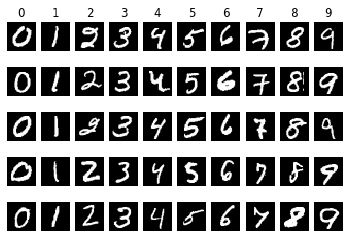

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_mnist(data, classes):
    
    for i in range(10):
        idxs = (classes == i)
        
        # get 10 images for class i
        images = data[idxs][0:10]
            
        for j in range(5):   
            plt.subplot(5, 10, i + j*10 + 1)
            plt.imshow(images[j].reshape(28, 28), cmap='gray')
            # print a title only once for each class
            if j == 0:
                plt.title(i)
            plt.axis('off')
    plt.show()

classes = np.argmax(y_train, 1)
plot_mnist(x_train, classes)

## Application de l'algorithme 

* On utilise la librairie scikit-learn pour appliquer l'ACP sur les données d'entraînement

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(x_train)

print("Pourcentage de variance expliqué : ", pca.explained_variance_ratio_)

Pourcentage de variance expliqué :  [0.09694991 0.07074008 0.06175909]


* Nous avons bien résumé les données d'entrées sur trois variables. Déterminons maintenant le pourcentage de la variance du dataset expliqué par ces deux variables 

# Visualisation des features apprises

On utilise seaborn et matlpotlib pour la visualisation

* En deux dimensions

Dimension après réduction :  (55000, 3)


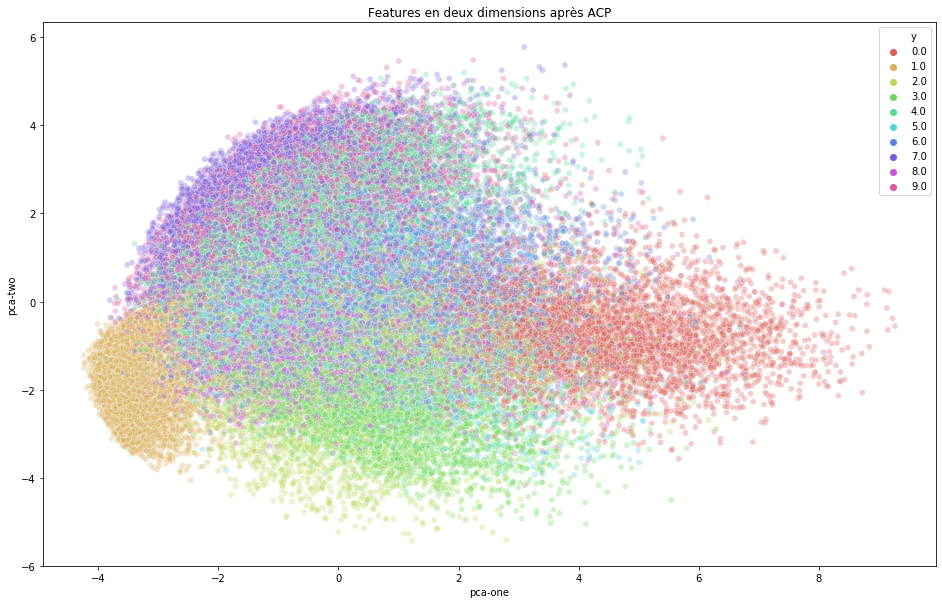

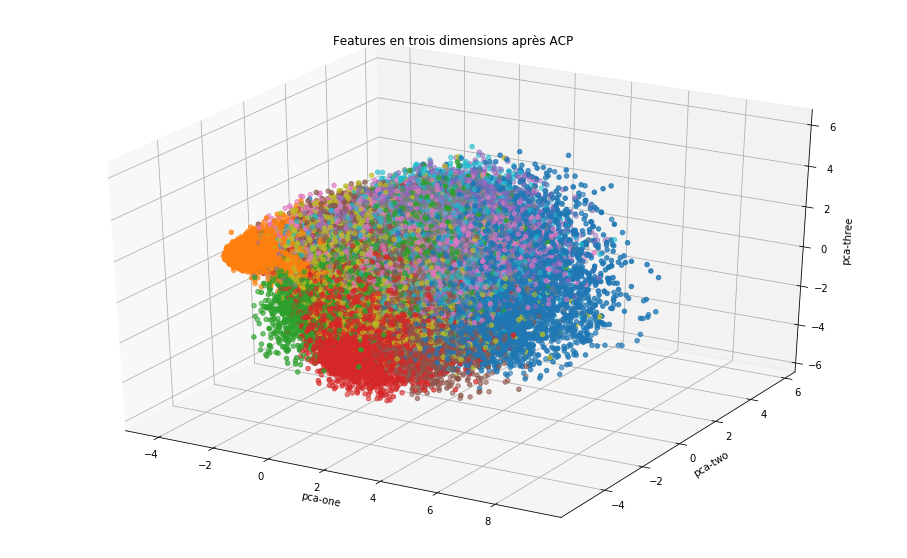

In [37]:
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

print("Dimension après réduction : ", x_train_pca.shape)

# Les labels dans y_train sont "one hot encodés", on les convertis en nombres correspondant au label
y_label = np.sum(np.multiply(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), y_train), axis=1)

#On range les composantes principales (vecteurs propres de la matrice de covariance) ainsi que les labels dans une dataframe pandas
pca_df = pd.DataFrame()
pca_df['pca-one'] = x_train_pca[:,0]
pca_df['pca-two'] = x_train_pca[:,1]
pca_df['pca-three'] = x_train_pca[:,2] 
pca_df['y'] = y_label

#Visualisation en 2d
plt.figure(figsize=(16,10))
plt.title("Features en deux dimensions après ACP")
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=pca_df,
    legend="full",
    alpha=0.3
)


* En trois dimensions

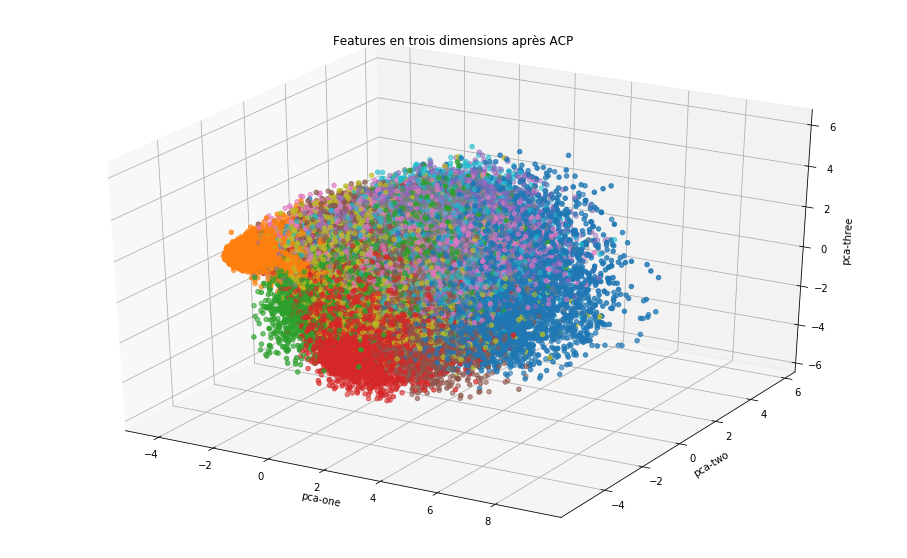

In [38]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
plt.title("Features en trois dimensions après ACP")

ax.scatter(
    xs=pca_df["pca-one"], 
    ys=pca_df["pca-two"], 
    zs=pca_df["pca-three"], 
    c=pca_df["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()